# Actividad Regresion Lineal

Con las base de datos de ENSANUT para adultos de entre 25 y 65 años de los estados del Occidente del pais, estadiar las relaciones siguientes:

1. Peso y estatura; incluyendo ajustar un modelo de regresión lineal simple. Use peso como variable dependiente y a estatura como independiente. Comente el tipo de relación, el coeficiente de correlación y la calidad del ajuste del modelo. 

2.  Peso y cintura; incluyendo ajustar un modelo de regresión lineal simple. Interprete. 

3. ¿Quién pronostica mejor el peso: estutura o cintura?

---

In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from scipy import stats

df = pd.read_excel('EnsanutMediciones.xls')

#### Limpieza y filtrado de datos

In [121]:
columnas = ['sexo', 'edad', 'peso', 'cintura', 'talla', 'entidad']
df = df[columnas]

for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')
    
# limpeza cintura
df = df[df['cintura'] != 222.2]
df.dropna(subset=['cintura'], inplace=True)

# limpieza talla
df = df[df['talla'] != 222.2]
df.dropna(subset=['talla'], inplace=True)

# limpieza peso
df = df[df['peso'] != 222.2]
df.dropna(subset=['peso'], inplace=True)

In [122]:
df = df[(df['edad'] >= 25) & (df['edad'] <= 65)]
df = df[(df['entidad'] == 1) | 
        (df['entidad'] == 6) | 
        (df['entidad'] == 11) | 
        (df['entidad'] == 14) |
        (df['entidad'] == 16) |
        (df['entidad'] == 18)]

#### Graficas de dispersión

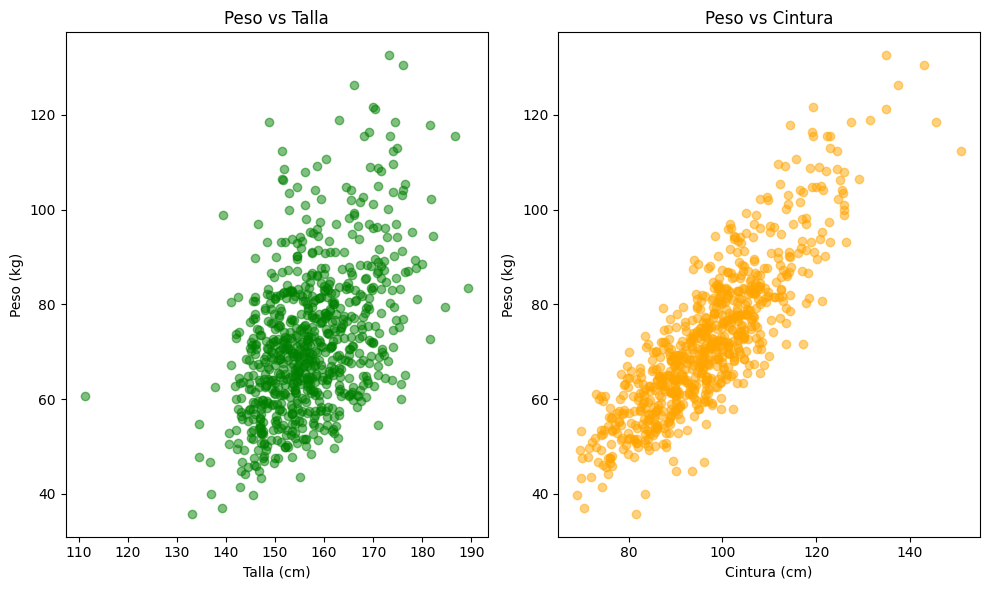

In [123]:
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.scatter(df['talla'], df['peso'], alpha=0.5, color='green')
plt.title('Peso vs Talla')
plt.xlabel('Talla (cm)')
plt.ylabel('Peso (kg)')

plt.subplot(1, 2, 2)
plt.scatter(df['cintura'], df['peso'], alpha=0.5, color='orange')
plt.title('Peso vs Cintura')
plt.xlabel('Cintura (cm)')
plt.ylabel('Peso (kg)')

plt.tight_layout()
plt.show()

In [124]:
# Eliminamos valor atípico en talla (valores solo mayores a 120 cm)
df = df[df['talla'] > 120]

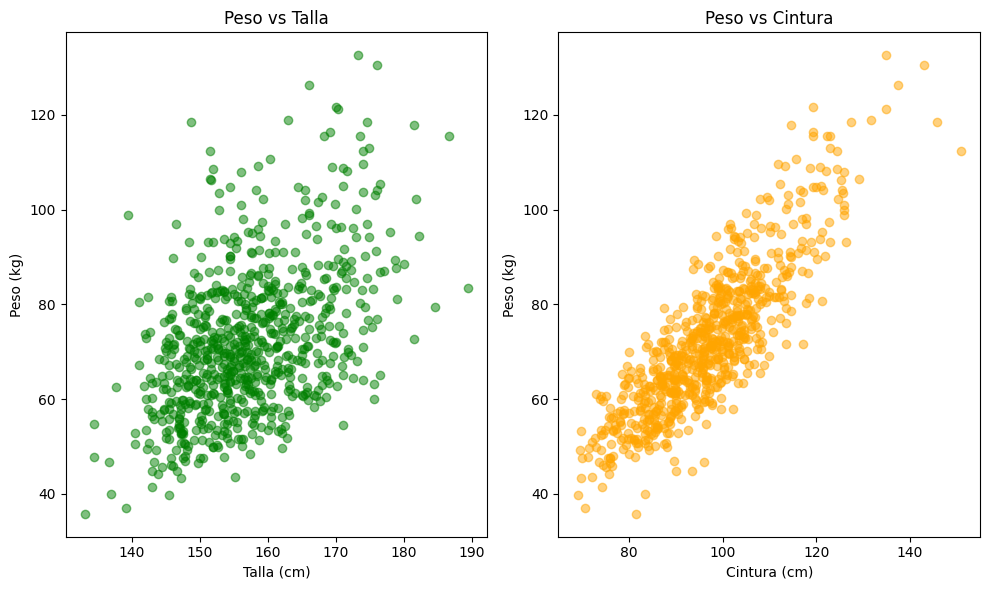

In [125]:
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.scatter(df['talla'], df['peso'], alpha=0.5, color='green')
plt.title('Peso vs Talla')
plt.xlabel('Talla (cm)')
plt.ylabel('Peso (kg)')

plt.subplot(1, 2, 2)
plt.scatter(df['cintura'], df['peso'], alpha=0.5, color='orange')
plt.title('Peso vs Cintura')
plt.xlabel('Cintura (cm)')
plt.ylabel('Peso (kg)')

plt.tight_layout()
plt.show()

#### 1. Peso y estatura

In [126]:
correlacion_talla = df['peso'].corr(df['talla'])

print(f'Coeficiente de correlación entre Peso y Talla: {correlacion_talla:.4f}')

Coeficiente de correlación entre Peso y Talla: 0.4791


In [127]:
x = df[['peso']]
y_talla = df['talla']

Coeficientes del modelo:
Intercepto: 136.8602650596502
Pendiente: 0.28166967049755975

El R² del modelo es: 23.0%


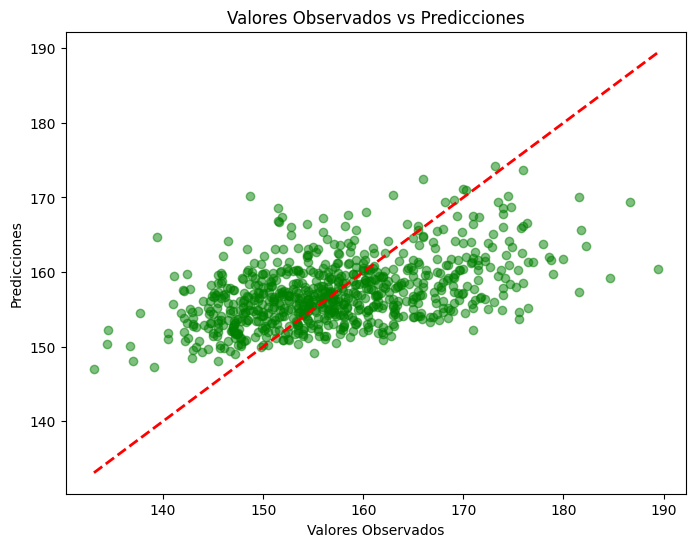

In [128]:
# Entrenamiento del modelo de regresión lineal para Talla
model_talla = LinearRegression()
model_talla.fit(x, y_talla)

# Estadisticos del modelo para Talla
print("Coeficientes del modelo:")
print(f"Intercepto: {model_talla.intercept_}")
print(f"Pendiente: {model_talla.coef_[0]}")

r2 = model_talla.score(x, y_talla)
print(f"\nEl R² del modelo es: {100 * round(r2, 3)}%")

# Predicciones
predicciones = model_talla.predict(x)

# Gráfico de valores observados vs predicciones
plt.figure(figsize=(8, 6))
plt.scatter(y_talla, predicciones, alpha=0.5, color='green')
plt.plot([y_talla.min(), y_talla.max()], [y_talla.min(), y_talla.max()], 'r--', lw=2)
plt.xlabel('Valores Observados')
plt.ylabel('Predicciones')
plt.title('Valores Observados vs Predicciones')
plt.show()

In [129]:
# Estadísticas adicionales del modelo
n = len(y_talla)
p = 1  # número de predictores
residuos = y_talla - predicciones
sse = np.sum(residuos**2)
sst = np.sum((y_talla - y_talla.mean())**2)
mse = sse / (n - p - 1)
se = np.sqrt(mse)

# Error estándar de los coeficientes
se_coef = se / np.sqrt(np.sum((x['peso'] - x['peso'].mean())**2))
se_intercept = se * np.sqrt(1/n + x['peso'].mean()**2 / np.sum((x['peso'] - x['peso'].mean())**2))

# Valores t
t_coef = model_talla.coef_[0] / se_coef
t_intercept = model_talla.intercept_ / se_intercept

# Valores p
p_coef = 2 * (1 - stats.t.cdf(abs(t_coef), n - p - 1))
p_intercept = 2 * (1 - stats.t.cdf(abs(t_intercept), n - p - 1))

print(f"\nEstadístico t (pendiente): {t_coef}")
print(f"Valor p (pendiente): {p_coef}")
print(f"\nR² ajustado: {1 - (1 - r2) * (n - 1) / (n - p - 1)}")


Estadístico t (pendiente): 14.907642874404814
Valor p (pendiente): 0.0

R² ajustado: 0.22849532666323458


---

#### 2. Peso y cintura

In [130]:
correlacion_cintura = df['peso'].corr(df['cintura'])

print(f'Coeficiente de correlación entre Peso y Cintura: {correlacion_cintura:.4f}')

Coeficiente de correlación entre Peso y Cintura: 0.8558


In [131]:
x = df[['peso']]
y_cintura= df['cintura']

Coeficientes del modelo:
Intercepto: 46.344268556842
Pendiente: 0.69856918531693

El R² del modelo es: 73.2%


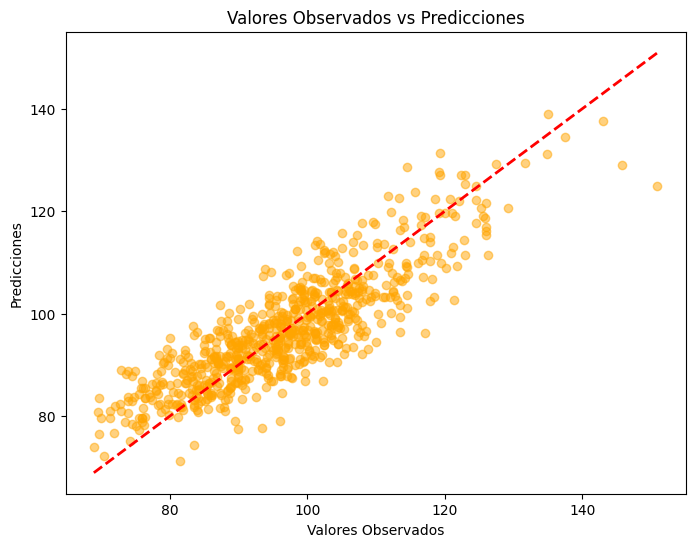

In [132]:
# Entrenamiento del modelo de regresión lineal para Cintura
model_cintura = LinearRegression()
model_cintura.fit(x, y_cintura)

# Estadisticos del modelo para Cintura
print("Coeficientes del modelo:")
print(f"Intercepto: {model_cintura.intercept_}")
print(f"Pendiente: {model_cintura.coef_[0]}")

r2 = model_cintura.score(x, y_cintura)
print(f"\nEl R² del modelo es: {100 * round(r2, 3)}%")

# Predicciones
predicciones = model_cintura.predict(x)

# Gráfico de valores observados vs predicciones
plt.figure(figsize=(8, 6))
plt.scatter(y_cintura, predicciones, alpha=0.5, color='orange')
plt.plot([y_cintura.min(), y_cintura.max()], [y_cintura.min(), y_cintura.max()], 'r--', lw=2)
plt.xlabel('Valores Observados')
plt.ylabel('Predicciones')
plt.title('Valores Observados vs Predicciones')
plt.show()

In [133]:
# Estadísticas adicionales del modelo
n = len(y_cintura)
p = 1  # número de predictores
residuos = y_cintura - predicciones
sse = np.sum(residuos**2)
sst = np.sum((y_cintura - y_cintura.mean())**2)
mse = sse / (n - p - 1)
se = np.sqrt(mse)

# Error estándar de los coeficientes
se_coef = se / np.sqrt(np.sum((x['peso'] - x['peso'].mean())**2))
se_intercept = se * np.sqrt(1/n + x['peso'].mean()**2 / np.sum((x['peso'] - x['peso'].mean())**2))

# Valores t
t_coef = model_talla.coef_[0] / se_coef
t_intercept = model_talla.intercept_ / se_intercept

# Valores p
p_coef = 2 * (1 - stats.t.cdf(abs(t_coef), n - p - 1))
p_intercept = 2 * (1 - stats.t.cdf(abs(t_intercept), n - p - 1))

print(f"\nEstadístico t (pendiente): {t_coef}")
print(f"Valor p (pendiente): {p_coef}")
print(f"\nR² ajustado: {1 - (1 - r2) * (n - 1) / (n - p - 1)}")


Estadístico t (pendiente): 18.21743941593214
Valor p (pendiente): 0.0

R² ajustado: 0.7320016504103082


---

#### 3. ¿Quien pronostica mejor?